<a href="https://colab.research.google.com/github/mvmorr/CE888_Assignment2/blob/master/Zoo_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load, prepare and inspect the datasets

Zoo datasets

In [0]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, permutation_test_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from google.colab import drive

In [0]:
#Load dataset
data = pd.read_csv("zoo.csv")
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [0]:
#drop unnecessary data feature
data.drop(['animal_name'],axis=1, inplace=True)

In [0]:
#Split
X = data.drop(['venomous'], axis=1)
y = data.venomous

In [0]:
X.shape, y.shape

((100, 16), (100,))

In [0]:
#baseline
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, X, y)
scores.mean()

0.85

In [0]:
#baseline
clf = RandomForestRegressor()
scores = cross_val_score(clf, X, y)
scores.mean()

-0.2047363189642689

Stratified Cross Validation, Elbow and Silhouette method


In [0]:
#KFold
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

5

In [0]:
print(skf)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [0]:
#Silhouette method
def silhouette(X_train, n_clusters):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)
  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
  # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(X_train)
  print(cluster_labels)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
  silhouette_avg = silhouette_score(X_train, cluster_labels)
  print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
  centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
              c="white", alpha=1, s=200, edgecolor='k')

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                  s=50, edgecolor='k')

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
                fontsize=14, fontweight='bold')

  plt.show()


In [0]:
#dataset to number of samples with the same ratios
X_train = []
X_test = []
y_train = []
y_test = []
k_centers = []
# train_index, test_index = next(iter(skf.split(X,y)))
for train_index, test_index in skf.split(X, y):
  print("Train:", train_index, "Test:", test_index)
  X_train.append(X.iloc[train_index])
  X_test.append(X.iloc[test_index])
  y_train.append(y.iloc[train_index])
  y_test.append(y.iloc[test_index])

Train: [19 20 21 22 23 24 25 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99] Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 26]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 26 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99] Test: [19 20 21 22 23 24 25 27 28 29 30 31 32 33 34 35 36 37 38 39]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 58 59 60 61 63 64 65 66
 67 68 69 70 71 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99] Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 62 72]
Train: [ 0  1  2  3  4  5  6  7  8  9 10

In [0]:
y_test[1].shape

(20,)

In [0]:
#Elbow method to get the values
def elbow_method(train, i):
  means = KMeans(n_clusters=i)
  means.fit(train)
  return means.inertia_

In [0]:
#get minority class 

def measure_minority_class(labels, true_labels):
  count = 0
  total = 0
  for i in range(len(labels)):
    if true_labels[i] == 1: 
      total += 1
      if true_labels[i] == labels[i]:
        count+=1
  print("Complete Minority:",count/total)
  if count/total != 1:
    return True
  return False

[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1
 1 1 1 0 1 0]
For n_clusters = 2 The average silhouette_score is : 0.45872579678058256


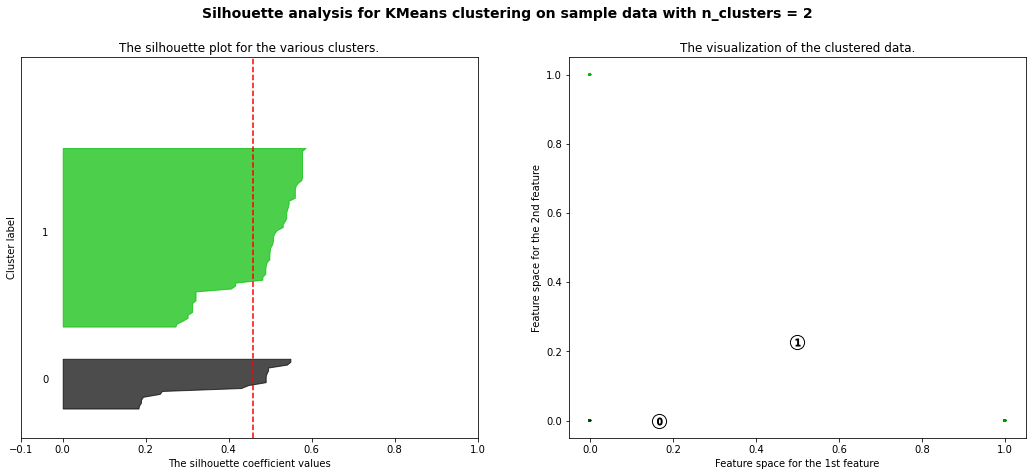

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 0 1 0 1]
Complete Minority: 0.5714285714285714
[0 0 1 0 0 0 0 1 1 0 0 0 1 1 2 2 0 0 1 0 0 0 0 0 2 2 2 0 0 0 2 0 0 0 1 0 0
 0 1 2 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 2 1 0 2 2 0 0 1 0
 0 0 0 2 0 1]
For n_clusters = 3 The average silhouette_score is : 0.4953358687964323


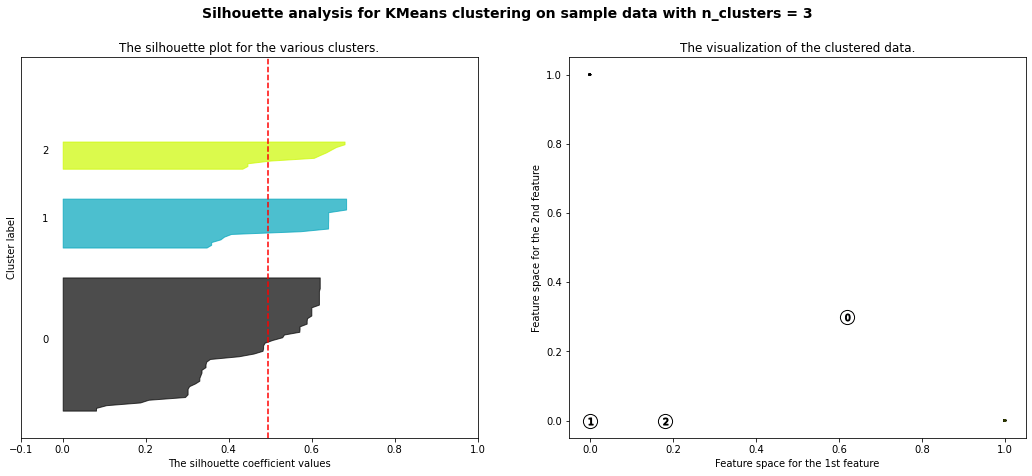

[1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1
 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1
 1 1 1 0 1 0]
Complete Minority: 0.0
[1 1 2 1 1 1 1 2 2 1 1 0 2 2 3 3 0 1 2 0 0 0 1 0 3 3 3 1 1 1 3 1 1 0 2 1 1
 0 2 3 3 0 3 0 1 1 3 1 1 1 1 3 3 3 1 1 0 0 2 3 2 2 2 0 1 3 2 0 3 3 0 0 2 1
 1 0 1 3 1 2]
For n_clusters = 4 The average silhouette_score is : 0.5032577829453836


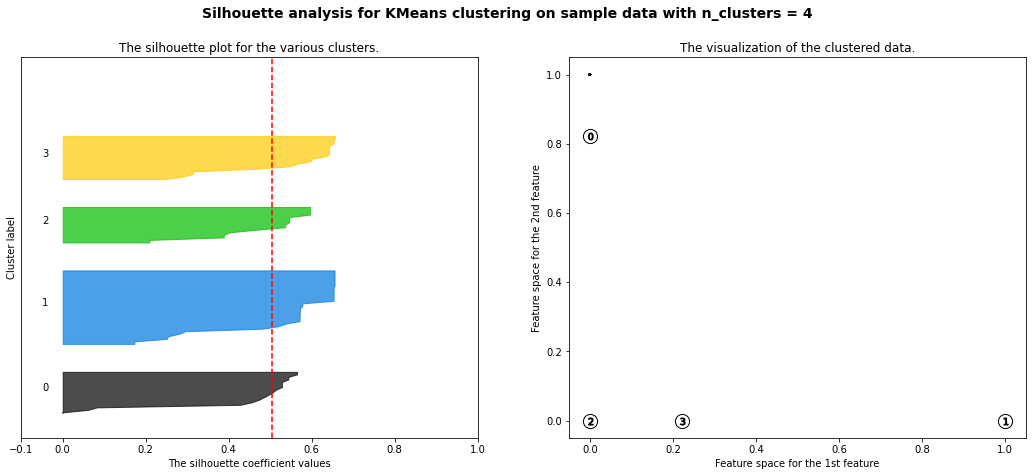

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 0 1 0 1]
Complete Minority: 0.6666666666666666
[0 0 2 0 0 0 0 2 2 0 0 3 2 2 1 1 3 0 2 4 3 3 0 3 1 1 1 4 0 4 1 0 4 3 2 0 0
 3 2 1 1 3 1 3 0 0 1 0 0 0 0 1 1 1 0 0 3 3 3 3 2 2 2 0 0 0 4 0 0 0 0 3 1 2
 4 4 2 2 3 3]
For n_clusters = 5 The average silhouette_score is : 0.5595420267458513


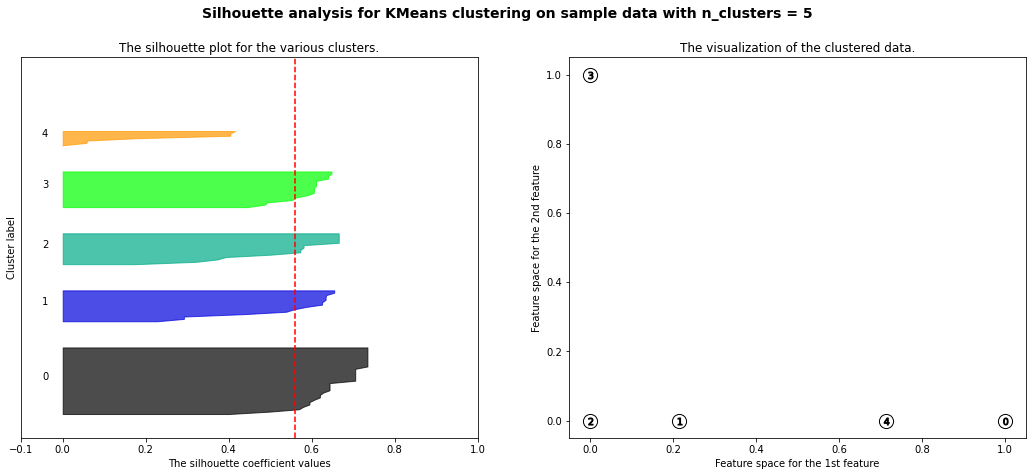

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0]
Complete Minority: 0.6666666666666666


In [0]:
#Train Random forest and get final cluster
rm = RandomForestRegressor()
count = 1
Sum_of_squared_distances = []
final_clustering = []
for i in range(len(X_train)):
  if count > 1:
    silhouette(X_train[i], count)
    km = KMeans(n_clusters=2)
    km.fit(X_train[i])
    final_clustering.append(km.labels_)
    print(km.labels_)
    if measure_minority_class(km.labels_, y_train[i].values):
      rm.fit(X_train[i], y_train[i])
    Sum_of_squared_distances.append(elbow_method(X_train[i], count))
  count+=1

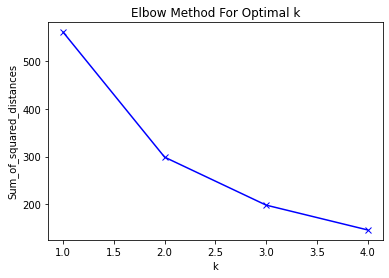

In [0]:
#Show elbow
K = range(1,5)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Box plot


In [0]:
score_average = []
for j in range(len(X_test)):
  score, perm, pvalue = permutation_test_score(rm, X_test[j], y_test[j], cv=10, n_permutations=10)
  print(score)
  print(perm)
  print(pvalue)
  score_average.append(score)

0.2
[0.2 0.3 0.2 0.6 0.1 0.1 0.2 0.1 0.2 0.2]
0.7272727272727273
0.2
[ 0.  -0.1  0.2  0.1  0.   0.   0.2 -0.1  0.   0.1]
0.2727272727272727
0.2
[ 0.19059678  0.12414     0.64646    -0.02943347 -0.2         0.37508
 -0.26962    -0.2         0.         -0.17013724]
0.2727272727272727
0.3
[-0.05036944  0.29162    -0.08066     0.06616551 -0.20484    -0.20162
 -0.1         0.024955    0.          0.00398   ]
0.09090909090909091
-0.20017999999999997
[-0.09929736 -0.2000922   0.04768    -0.10372    -0.08956    -0.23904334
 -0.1169      0.0735     -0.2025     -0.24619209]
0.7272727272727273


In [0]:
rm.predict(X_test[0])
y_test[0].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [0]:
for k in range(len(score_average)):
  print(score_average[k])

0.2
0.2
0.2
0.3
-0.20017999999999997


In [0]:
np.array(score_average).mean()

0.13996400000000003

In [0]:
np.array(score_average).std()

0.1744261596894227

{'boxes': [<matplotlib.lines.Line2D at 0x7f7624596860>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76246442b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f76246710b8>,
 'means': [<matplotlib.lines.Line2D at 0x7f7624644d30>,
 'medians': [<matplotlib.lines.Line2D at 0x7f76246449b0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7624596b70>,
  <matplotlib.lines.Line2D at 0x7f7624671b70>]}

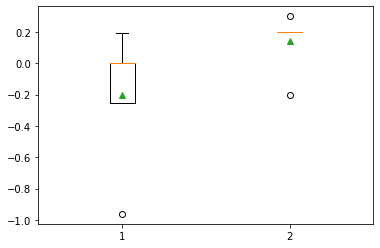

In [0]:
fig, ax = plt.subplots()
ax.boxplot([scores, score_average], showmeans=True)